## ML For Fraud Detection
#### Dataset
##### Synthetic Financial Dataset For Fraud Detection (source: www.kaggle.com)
#### References
##### Financial Fraud Detection using Decision Tree Machine Learning Models (Elena Boiarskaia, www.databricks.com, 2019)
##### Fraud Detection on Financial Transactions with Machine Learning on Google Cloud (Google, www.qwiklabs.com)
##### Data Mining: Practical Machine Learning Tools and Techniques (Ian Witten, Morgan Kaufmann Publishing, 2011)

### Step 1: Load Data

In [0]:
# Import python packages

import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import itertools
from sklearn import metrics, datasets, neighbors
from pyspark.sql import SparkSession
from pyspark.sql import types
from pyspark.sql import functions as F
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import avg
from pyspark.sql.functions import lit, expr, col, column

In [0]:
# Import synthetic fraud ATM csv data file

file_location = "/FileStore/tables/PS_20174392719_1491204439457_log.csv"
file_type = "csv"

infer_schema = "false"
delimiter = ","

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", 'true') \
  .option("sep", delimiter) \
  .load(file_location)

#display(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0
1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0
1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
# Change data field types for analysis

df = df.withColumn("amount",F.col("amount").cast("double")).withColumn("oldbalanceOrg",F.col("oldbalanceOrg").cast("double")).withColumn("newbalanceOrig",F.col("newbalanceOrig").cast("double")).withColumn("oldbalanceDest",F.col("oldbalanceDest").cast("double")).withColumn("newbalanceDest",F.col("newbalanceDest").cast("double"))

df.printSchema()

root
-- step: string (nullable = true)
-- type: string (nullable = true)
-- amount: double (nullable = true)
-- nameOrig: string (nullable = true)
-- oldbalanceOrg: double (nullable = true)
-- newbalanceOrig: double (nullable = true)
-- nameDest: string (nullable = true)
-- oldbalanceDest: double (nullable = true)
-- newbalanceDest: double (nullable = true)
-- isFraud: string (nullable = true)
-- isFlaggedFraud: string (nullable = true)

In [0]:
# Add columns calculating change in account balances after transactions

df = df.withColumn("orgDiff", df.newbalanceOrig - df.oldbalanceOrg).withColumn("destDiff", df.newbalanceDest - df.oldbalanceDest)
#display(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgDiff,destDiff
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.640000000014,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.2799999999988,0.0
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,-181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,-181.0,-21182.0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0
1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,-7817.709999999999,0.0
1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,-7107.7699999999895,0.0
1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0,-7861.640000000014,0.0
1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0,-2671.0,0.0
1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0,-5337.769999999997,-1549.2099999999991


In [0]:
# View cases initially flagged as fraud in the original data file

initially_flagged_fraud = df.filter(df.isFlaggedFraud == 1).count()
print(initially_flagged_fraud)

16

In [0]:
# View cases that are fraud in original data file

initially_isfraud = df.filter(df.isFraud == 1).count()
print(initially_isfraud)

8213

In [0]:
# View the total number of cases in the dataset

total_cases_df = df.count()
print("The total number of cases in the data set are: " + str(total_cases_df))

The total number of cases in the data set are: 6362620

### Step 2: Create Pattern

In [0]:
# The dataset contains rare events of fraud which is expected. 
# Add new fraud classification label based on data that follows the pattern defined here in order to make the sequence of fraudulent behaviour more obvious for the model  

df = df.withColumn("label",F.when(((df.oldbalanceOrg <= 50000) & (df.type == "TRANSFER") & (df.newbalanceDest <= 100)) | ( (df.oldbalanceOrg > 50000) & (df.newbalanceOrig <= 10)) | ( (df.oldbalanceOrg > 50000) & (df.newbalanceOrig > 10) & (df.amount > 1000000)), 1).otherwise(0))

#display(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgDiff,destDiff,label
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.640000000014,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.2799999999988,0.0,0
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,-181.0,0.0,1
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,-181.0,-21182.0,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0,0
1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,-7817.709999999999,0.0,0
1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,-7107.7699999999895,0.0,0
1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0,-7861.640000000014,0.0,0
1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0,-2671.0,0.0,0
1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0,-5337.769999999997,-1549.2099999999991,0


In [0]:
# View cases that are manually categorized as fraud based on a rule pattern

fraud_cases = df.filter(df.label == 1).count()
total_cases = df.count()
fraud_pct = 1.*fraud_cases/total_cases

print("The total number of cases are: " + str(total_cases))
print("The number of fraud cases identified by the pattern are: " + str(fraud_cases))
print("The percentage of cases identified as fraud are: " + str(fraud_pct))

The total number of cases are: 6362620
The number of fraud cases identified by the pattern are: 314086
The percentage of cases identified as fraud are: 0.049364255605395264

In [0]:
# Create view for charts

df.createOrReplaceTempView("tmpviewchart")

### Step 3: Create Datasets

In [0]:
# Create training and test datasets based on an 80/20 hold out approach

(train, test) = df.randomSplit([0.8, 0.2], seed=12345)

In [0]:
# Cache and print counts for training and test data sets

train.cache()
test.cache()

print("The total count is: %s" % (df.count()))
print("The training count is: %s" % (train.count()))
print("The test count is: %s" % (test.count()))

The total count is: 6362620
The training count is: 5090735
The test count is: 1271885

### Step 4: Train Model

In [0]:
# Configure a decision tree model based on the binary classification desired from the dataset

indexer = StringIndexer(inputCol = "type", outputCol = "typeIndexed")
va = VectorAssembler(inputCols = ["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "orgDiff", "destDiff"], outputCol = "features")
dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", seed = 54321, maxDepth = 5)

pipeline = Pipeline(stages=[indexer, va, dt])

In [0]:
# Define model variable based on ML pipeline above

dt_model = pipeline.fit(train)

In [0]:
# Transform model variable to create training and test predictions

train_pred = dt_model.transform(train)
test_pred = dt_model.transform(test)

### Step 5: Evaluate Results

In [0]:
# Define model evaluation metric

evaluatorPR = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderPR")

In [0]:
# Evaluate the model on training dataset

pr_train = evaluatorPR.evaluate(train_pred)

In [0]:
# Evaluate the model on test dataset

pr_test = evaluatorPR.evaluate(test_pred)

In [0]:
# Print out the Precision-Recall curve values

print("PR train:", pr_train)
print("PR test:", pr_test)

PR train: 0.9812487708653265
PR test: 0.9802515916919915

In [0]:
# Check confustion matrix false negative, false positive, ture negative, and true positive values

fn = test_pred.filter((test_pred.label == 1) & (test_pred.prediction == 0)).count()
fp = test_pred.filter((test_pred.label == 0) & (test_pred.prediction == 1)).count()
tn = test_pred.filter((test_pred.label == 0) & (test_pred.prediction == 0)).count()
tp = test_pred.filter((test_pred.label == 1) & (test_pred.prediction == 1)).count()

cm_dt = test_pred.groupBy("label", "prediction").count()
display(cm_dt)

label,prediction,count
1,0.0,32
0,0.0,1207889
1,1.0,62716
0,1.0,1248


In [0]:
# Print confusion matrix values to check above dataframe

print(fn)
print(fp)
print(tn)
print(tp)

32
1248
1207889
62716

### Step 6: Balance Trainset

In [0]:
# Create a balanced training set by under sampling the non fraud cases so that the trainset has equal number of non fraud and fraud classifications to train and tune a better model

dfNo = train.filter(train.label == 0)
dfFraud = train.filter(train.label == 1)
TotalTrain = train.count()
TotalFraud = dfFraud.count()
percent_Fraud = TotalFraud/TotalTrain
df_balance = dfNo.sample(False, percent_Fraud, seed = 92285).union(dfFraud)


### Step 7: Tune Model

In [0]:
# Tune model with cross validation on the balanced training data

evaluatorROC = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderROC")

paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.maxBins, [10, 20, 30]) \
    .build()

crossval_balance = CrossValidator(estimator = dt,estimatorParamMaps = paramGrid,evaluator = evaluatorROC,numFolds = 3) 
pipelineCV_balance = Pipeline(stages=[indexer, va, crossval_balance])
cvModel_balance = pipelineCV_balance.fit(df_balance)

In [0]:
# Transform tuned model variable to create training and test predictions

train_pred_balance = cvModel_balance.transform(df_balance)
test_pred_balance = cvModel_balance.transform(test)

In [0]:
# Check cross validation tuned confustion matrix false negative, false positive, ture negative, and true positive values

fn_balance = test_pred_balance.filter((test_pred_balance.label == 1) & (test_pred_balance.prediction == 0)).count()
fp_balance = test_pred_balance.filter((test_pred_balance.label == 0) & (test_pred_balance.prediction == 1)).count()
tn_balance = test_pred_balance.filter((test_pred_balance.label == 0) & (test_pred_balance.prediction == 0)).count()
tp_balance = test_pred_balance.filter((test_pred_balance.label == 1) & (test_pred_balance.prediction == 1)).count()

cm_dt_balance = test_pred_balance.groupBy("label", "prediction").count()
display(cm_dt_balance)

label,prediction,count
1,0.0,2
0,0.0,1201265
1,1.0,62746
0,1.0,7872


In [0]:
# Print confusion matrix values to check above dataframe

print(fn_balance)
print(fp_balance)
print(tn_balance)
print(tp_balance)

2
7872
1201265
62746

### Step 8: Run Experiment

In [0]:
# Run experiment with gradient boosted tree model (58229)

gbt = GBTClassifier(labelCol="label", featuresCol="features", seed = 58228)
gbt_pipeline = Pipeline(stages=[indexer, va, gbt])
gbt_model = gbt_pipeline.fit(df_balance)

train_pred_gbt_balance = gbt_model.transform(df_balance)
test_pred_gbt_balance = gbt_model.transform(test)

In [0]:
# Check gbt confustion matrix false negative, false positive, ture negative, and true positive values

fn_gbt = test_pred_gbt_balance.filter((test_pred_gbt_balance.label == 1) & (test_pred_gbt_balance.prediction == 0)).count()
fp_gbt = test_pred_gbt_balance.filter((test_pred_gbt_balance.label == 0) & (test_pred_gbt_balance.prediction == 1)).count()
tn_gbt = test_pred_gbt_balance.filter((test_pred_gbt_balance.label == 0) & (test_pred_gbt_balance.prediction == 0)).count()
tp_gbt = test_pred_gbt_balance.filter((test_pred_gbt_balance.label == 1) & (test_pred_gbt_balance.prediction == 1)).count()

cm_gbt = test_pred_gbt_balance.groupBy("label", "prediction").count()
display(cm_gbt)

label,prediction,count
0,0.0,1203322
1,1.0,62747
0,1.0,5815
1,0.0,1


In [0]:
# Print confusion matrix values to check above dataframe

print(fn_gbt)
print(fp_gbt)
print(tn_gbt)
print(tp_gbt)

1
5815
1203322
62747

In [0]:
from pyspark.ml.classification import RandomForestClassifier
 
# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
rf_pipeline = Pipeline(stages=[indexer, va, rf])
rf_model = rf_pipeline.fit(df_balance)

train_pred_rf_balance = rf_model.transform(df_balance)
test_pred_rf_balance = rf_model.transform(test)


In [0]:

fn_rf = test_pred_rf_balance.filter((test_pred_rf_balance.label == 1) & (test_pred_rf_balance.prediction == 0)).count()
fp_rf = test_pred_rf_balance.filter((test_pred_rf_balance.label == 0) & (test_pred_rf_balance.prediction == 1)).count()
tn_rf = test_pred_rf_balance.filter((test_pred_rf_balance.label == 0) & (test_pred_rf_balance.prediction == 0)).count()
tp_rf = test_pred_rf_balance.filter((test_pred_rf_balance.label == 1) & (test_pred_rf_balance.prediction == 1)).count()

cm_rf = test_pred_rf_balance.groupBy("label", "prediction").count()
display(cm_rf)

label,prediction,count
0,0.0,1196651
1,1.0,62747
0,1.0,12486
1,0.0,1


### Step 9: Analyze Results

In [0]:
# Create variable needed for 1st confusion matrix graphic

cmt = spark.createDataFrame([(1, 0), (0, 0), (1, 1), (0, 1)], ["label", "prediction"])
cmt.createOrReplaceTempView("cmt")

In [0]:
# Create plot function for confusion matrix graphic 

def plot_confusion_matrix(cm, title):

  plt.gcf().clear()
  fig = plt.figure(1)
  classes = ['Fraud', 'No Fraud']
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  normalize=False
  fmt = 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 
  
  image = fig 
  fig.savefig("confusion-matrix.png")
  display(image)
  plt.close(fig)

In [0]:
# Create view for 1st confusion matrix graphic

test_pred.createOrReplaceTempView("test_pred")
test_pred_cmdf = spark.sql("select a.label, a.prediction, coalesce(b.count, 0) as count from cmt a left outer join (select label, prediction, count(1) as count from test_pred group by label, prediction) b on b.label = a.label and b.prediction = a.prediction order by a.label desc, a.prediction desc")


In [0]:
# Create pandas dataframe for 1st confusion matrix graphic

cm_pdf = test_pred_cmdf.toPandas()
cm_1d = np.array(cm_pdf['count'])
cm = np.reshape(cm_1d, (-1, 2))

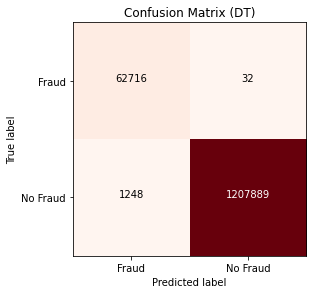

In [0]:
plot_confusion_matrix(cm, "Confusion Matrix (DT)")

In [0]:
# Create variable needed for confusion matrix of tuned model

cmt_tuned = spark.createDataFrame([(1, 0), (0, 0), (1, 1), (0, 1)], ["label", "prediction"])
cmt_tuned.createOrReplaceTempView("cmt_tuned")

In [0]:
# Create view for tuned confusion matrix graphic

test_pred_balance.createOrReplaceTempView("test_pred_balance")
test_pred_balance_cmdf = spark.sql("select a.label, a.prediction, coalesce(b.count, 0) as count from cmt_tuned a left outer join (select label, prediction, count(1) as count from test_pred_balance group by label, prediction) b on b.label = a.label and b.prediction = a.prediction order by a.label desc, a.prediction desc")

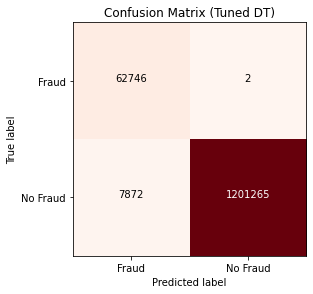

In [0]:
# Create pandas dataframe for tuned confusion matrix graphic

cm_tuned_pdf = test_pred_balance_cmdf.toPandas()
cm_tuned_1d = np.array(cm_tuned_pdf['count'])
cm_tuned = np.reshape(cm_tuned_1d, (-1, 2))

plot_confusion_matrix(cm_tuned, "Confusion Matrix (Tuned DT)")

In [0]:
# Create variable needed for confusion matrix of final model

cmt_tuned_final = spark.createDataFrame([(1, 0), (0, 0), (1, 1), (0, 1)], ["label", "prediction"])
cmt_tuned_final.createOrReplaceTempView("cmt_tuned_final")

In [0]:
test_pred_gbt_balance.createOrReplaceTempView("test_pred_gbt_balance")
test_pred_gbt_balance_cmdf = spark.sql("select a.label, a.prediction, coalesce(b.count, 0) as count from cmt_tuned_final a left outer join (select label, prediction, count(1) as count from test_pred_gbt_balance group by label, prediction) b on b.label = a.label and b.prediction = a.prediction order by a.label desc, a.prediction desc")

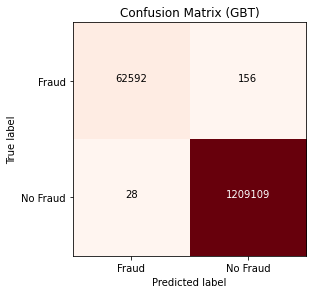

In [0]:
cm_tuned_final_pdf = test_pred_gbt_balance_cmdf.toPandas()
cm_tuned_final_1d = np.array(cm_tuned_final_pdf['count'])
cm_tuned_final = np.reshape(cm_tuned_final_1d, (-1, 2))

plot_confusion_matrix(cm_tuned_final, "Confusion Matrix (GBT)")

### Step 10: Add Visuals

In [0]:
# Add graphics for a dashboard view

In [0]:
%sql
select label, count(1) as `Transactions`, sum(amount) from tmpviewchart group by label

label,Transactions,sum(amount)
1,314086,1.489003382570498E11
0,6048534,9.954926065027126E11


In [0]:
%sql
select type, sum(amount), count(1) from tmpviewchart group by type

type,sum(amount),count(1)
TRANSFER,4.8529198726316956E11,532909
CASH_IN,2.3636739191246045E11,1399284
CASH_OUT,3.9441299522449023E11,2237500
PAYMENT,2.8093371138370014E10,2151495
DEBIT,2.2719922127999982E8,41432


In [0]:
display(dt_model.stages[-1])

treeNode
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":-53684.825,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":9.93,""categories"":null,""feature"":3,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":687951.0900000001,""categories"":null,""feature"":1,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":2360035.36,""categories"":null,""feature"":2,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":6,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":17,""featureType"":""continuous"",""prediction"":null,""threshold"":-35563.0,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":13,""featureType"":""continuous"",""prediction"":null,""threshold"":49711.0,""categories"":null,""feature"":2,""overflow"":false}"
